In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from utils import get_score_n_best_consecutive, get_score_n_after_peak
import os
from itertools import cycle
from plotting import *
from matplotlib.ticker import FormatStrFormatter

%load_ext autoreload
%autoreload 2

sns.reset_orig()
matplotlib.rcParams["figure.dpi"] = 100
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
FIG_SIZE = (6,4)
FIG_DIR = 'final-figures/'
FONTSIZE = 13
plt.style.use('grayscale')
subdir = 'split_fashion_mnist-permuted'

### Performance plots

bp max window mean 0.7020350000000001
ewc-1000 max window mean 0.716825
si-10 max window mean 0.73434
dfc-sparse-rec max window mean 0.7401416666666666


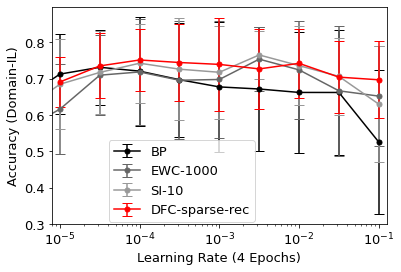

In [3]:
# domain-IL, continual learning benchmark comparison, LR evaluation
plot_performance('domain', 'CLB', 'LR', FIG_DIR, FIG_SIZE, subdir=subdir, fontsize=FONTSIZE, display_legend=True,
                 legend_loc=(0.17, 0.01))

bp max window mean 0.6817183333333333
ewc-1000 max window mean 0.6732183333333334
si-10 max window mean 0.6887383333333332
dfc-sparse-rec max window mean 0.6780366666666667


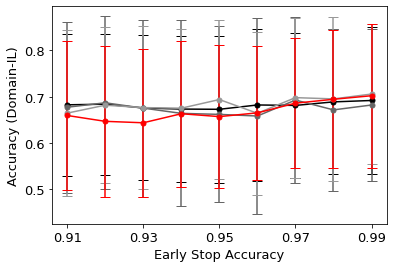

In [4]:
# domain-IL, continual learning benchmark comparison, early stop evaluation
plot_performance('domain', 'CLB', 'MIN_ACCU', FIG_DIR, FIG_SIZE, subdir=subdir, fontsize=FONTSIZE,
                xticks=np.arange(0.91, 1, 0.02))

dfc-standard max window mean 0.7129499999999999
dfc-rec max window mean 0.7079316666666667
dfc-sparse max window mean 0.6982883333333333
dfc-sparse-rec max window mean 0.7401416666666666


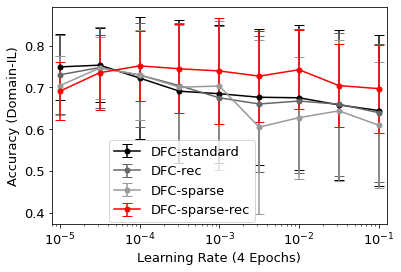

In [5]:
# domain-IL, dfc variants comparison, LR evaluation
plot_performance('domain', 'DFC', 'LR', FIG_DIR, FIG_SIZE, subdir=subdir, fontsize=FONTSIZE, display_legend=True, legend_loc=(0.17, 0.01))

bp max window mean 0.2531583333333333
ewc-1000 max window mean 0.231415
si-1000 max window mean 0.24567833333333333
dfc-sparse-rec max window mean 0.32393


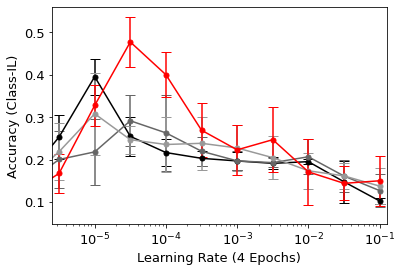

In [6]:
# class-IL, continual learning benchmark comparison, LR evaluation
plot_performance('class', 'CLB', 'LR', FIG_DIR, FIG_SIZE, subdir=subdir, fontsize=FONTSIZE)

bp max window mean 0.274675
ewc-1000 max window mean 0.24962166666666663
si-1000 max window mean 0.26935000000000003
dfc-sparse-rec max window mean 0.3559116666666667


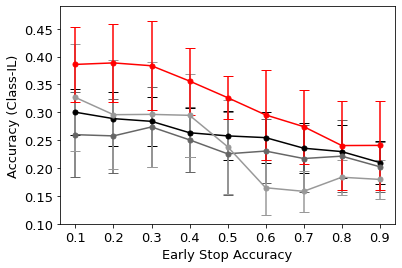

In [7]:
# class-IL, continual learning benchmark comparison, early stop evaluation
plot_performance('class', 'CLB', 'MIN_ACCU', FIG_DIR, FIG_SIZE, subdir=subdir, ylim=(0.1, 0.49), fontsize=FONTSIZE)

dfc-standard max window mean 0.29011
dfc-rec max window mean 0.28768
dfc-sparse max window mean 0.28674
dfc-sparse-rec max window mean 0.32393


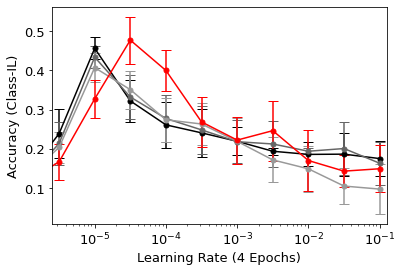

In [8]:
# class-IL, dfc variants comparison, LR evaluation
plot_performance('class', 'DFC', 'LR', FIG_DIR, FIG_SIZE, subdir=subdir, fontsize=FONTSIZE)

### Feedback plots

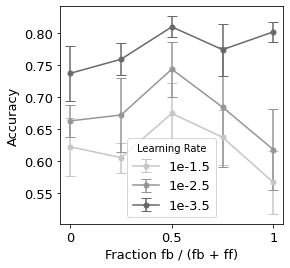

In [9]:
### sparsity selecting mix - domain-IL
plt.rcParams["figure.figsize"] = (4,4)
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.patch.set_facecolor('white')
plot_sparsity_mix(ax, [1.5, 2.5, 3.5], title='', cl_mode='domain')
plt.legend(prop={'size': FONTSIZE}, title='Learning Rate')
plt.xlabel('Fraction fb / (fb + ff)', fontsize=FONTSIZE)
plt.ylabel('Accuracy', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
fig.savefig(f'{FIG_DIR}ff-fw-mix-domainIL.svg', format='svg', bbox_inches = "tight")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


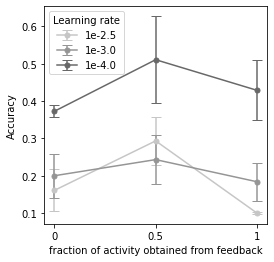

In [11]:
### sparsity selecting mix - class-IL
from plotting import *
%load_ext autoreload
%autoreload 2
plt.rcParams["figure.figsize"] = (4,4)
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.patch.set_facecolor('white')
plot_sparsity_mix(ax, [2.5, 3.0, 4.0], title='', cl_mode='class', frac_rec_deciding_sparsity=1)
plt.ylabel('Accuracy')
fig.savefig(f'{FIG_DIR}ff-fw-mix-classIL.svg', format='svg', bbox_inches = "tight")